<a href="https://colab.research.google.com/github/sdave-connexion/web-traffic-forecasting/blob/main/germany_data_using_Holt_Winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREDICTING FUTURE TRAFFIC VISITS




In [1]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

(55, 1)
             visits
date               
2021-01-24  1726427
2021-01-31  1651875
2021-02-07  2436377
2021-02-14  2753629
2021-02-21  2683528


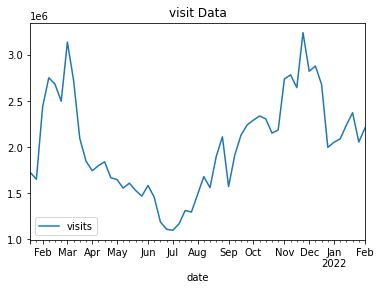

In [2]:
df = pd.read_csv('/content/all__uni_train.csv',index_col='date', parse_dates=True)
# finding shape of the dataframe
print(df.shape)
# having a look at the data
print(df.head())
# plotting the original data
df[['visits']].plot(title='visit Data')

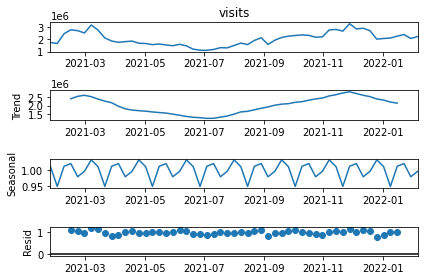

In [3]:
decompose_result = seasonal_decompose(df['visits'],model='multiplicative',period=7)
decompose_result.plot();

In [4]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df.index.freq = 'W-SUN'
# Set the value of Alpha and define m (Time Period)
w = 1
alpha = 1/(2*w)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


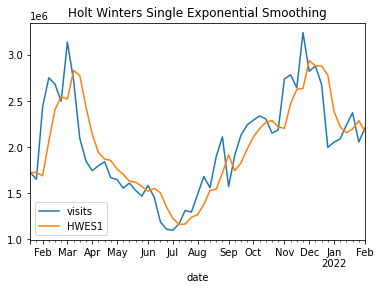

In [5]:
df['HWES1'] = SimpleExpSmoothing(df['visits']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df[['visits','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


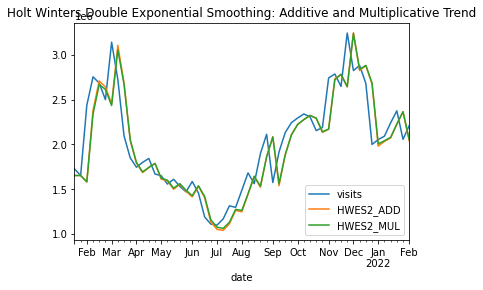

In [6]:
df['HWES2_ADD'] = ExponentialSmoothing(df['visits'],trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['visits'],trend='mul').fit().fittedvalues
df[['visits','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


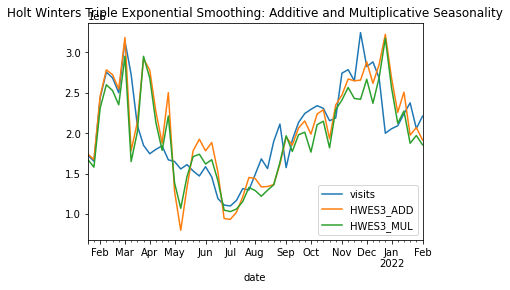

In [7]:
df['HWES3_ADD'] = ExponentialSmoothing(df['visits'],trend='add',seasonal='add',seasonal_periods=7).fit().fittedvalues
df['HWES3_MUL'] = ExponentialSmoothing(df['visits'],trend='mul',seasonal='mul',seasonal_periods=7).fit().fittedvalues
df[['visits','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [8]:
forecast_data = pd.read_csv('/content/all__uni_test.csv',index_col='date',parse_dates=True)
forecast_data.index.freq = 'W-SUN'

# Split into train and test set
train_df = df
test_df = forecast_data

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

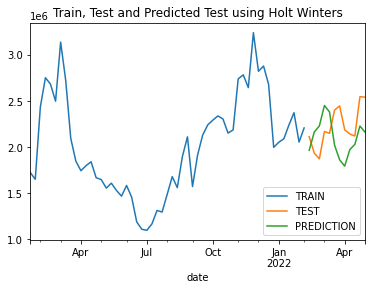

In [12]:
fitted_model = ExponentialSmoothing(train_df['visits'],trend='add',seasonal='mul',seasonal_periods=7).fit()
#fitted_model = SimpleExpSmoothing(df['visits']).fit(smoothing_level=alpha,optimized=False,use_brute=True)
test_predictions = fitted_model.forecast(12)
train_df['visits'].plot(legend=True,label='TRAIN')
test_df['visits'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

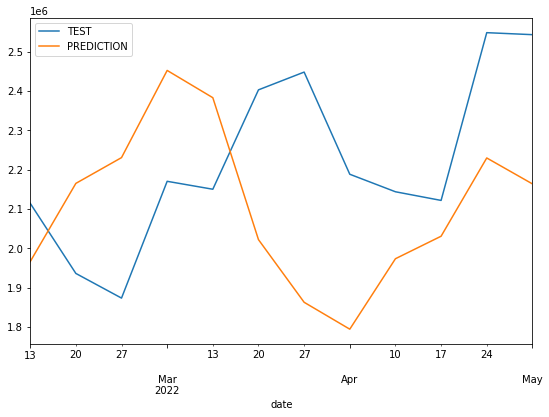

In [13]:
test_df['visits'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION');

In [14]:
df_forecast = pd.DataFrame(test_predictions)
df_forecast

,0
2022-02-13,1.966179e+06
2022-02-20,2.164922e+06
2022-02-27,2.230408e+06
2022-03-06,2.451938e+06
2022-03-13,2.382644e+06
2022-03-20,2.022026e+06
2022-03-27,1.862835e+06
2022-04-03,1.794506e+06
2022-04-10,1.973508e+06
2022-04-17,2.030682e+06
